## 1

#### Load the CSV dataset above. Check the "date" and "revenue" data types. Write another code to check for any duplicates in the "spare_parts" column. Use a histogram to visualize the distribution of total sales for the entire store. Do you notice any outliers in the histogram?

In [1]:
import pandas as pd

df = pd.read_csv("spare_parts_expanded.csv")
df.head()

,spare_parts,quantity,costs,sale_price,date,total_revenue
0,Wheel,24,30,53,1 01 2020,"$1,272"
1,Tyre,20,80,110,2 01 2020,"$2,200"
2,Battery,46,85,95,3 01 2020,"$4,370"
3,Air Filter,37,36,48,4 01 2020,"$1,776"
4,Oil Filter,28,96,120,5 01 2020,"$3,360"


In [2]:
df[["date","total_revenue"]].dtypes

date             object
total_revenue    object
dtype: object

In [3]:
df.isnull().sum()

spare_parts      0
quantity         0
costs            0
sale_price       0
date             0
total_revenue    0
dtype: int64

In [4]:
df["spare_parts"].duplicated().sum()

10

In [5]:
# Remove comma from the total revenue column
df["total_revenue"] = df["total_revenue"].replace(",","",regex=True)

# Remove $ from the total_revenue column
df["total_revenue"] = df["total_revenue"].str.replace("$", "").astype(int)
df.head()

,spare_parts,quantity,costs,sale_price,date,total_revenue
0,Wheel,24,30,53,1 01 2020,1272
1,Tyre,20,80,110,2 01 2020,2200
2,Battery,46,85,95,3 01 2020,4370
3,Air Filter,37,36,48,4 01 2020,1776
4,Oil Filter,28,96,120,5 01 2020,3360


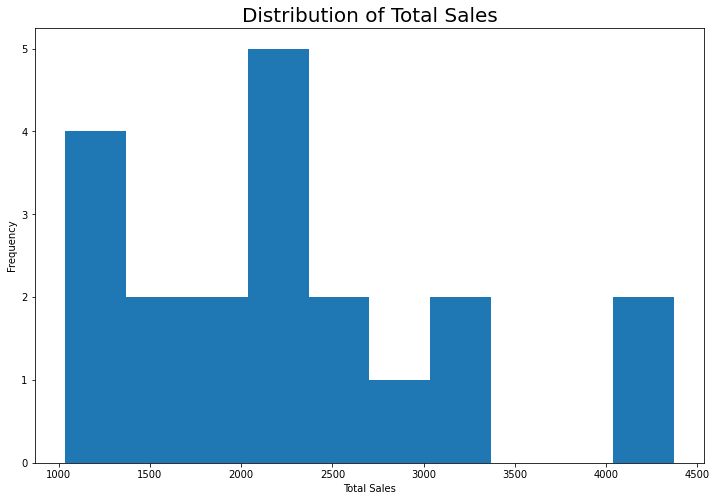

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(df['total_revenue'], bins = 10)
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Total Sales", fontsize = 20)
plt.show()

## 2

#### Boxplots are useful for identifying outliers, visualizing the median, quartiles, and range of the dataset, and comparing the distributions of different groups or categories within the dataset. Use a box plot of the seaborn library to compare the distribution of total sales for each item.

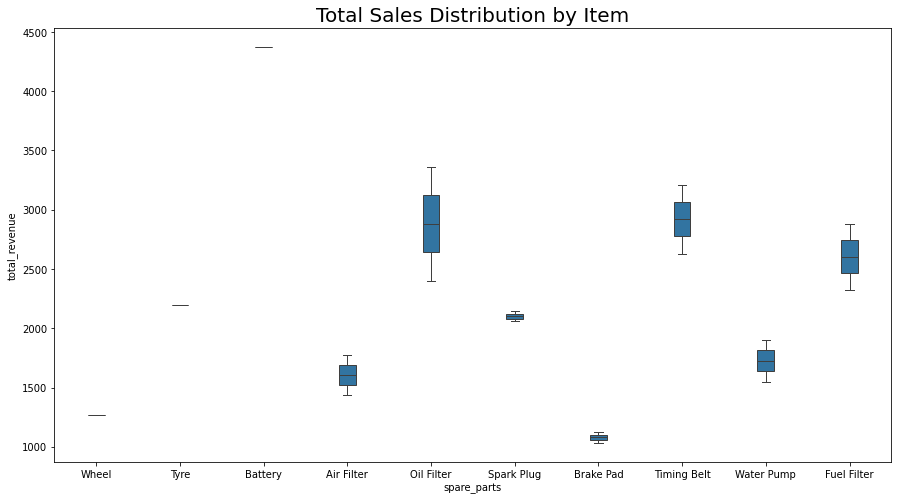

In [7]:
import seaborn as sns

plt.subplots(figsize=(15, 8))
sns.boxplot(x="spare_parts", y="total_revenue", 
            data=df,  
            width=0.2, 
            linewidth=1.0 )
plt.title("Total Sales Distribution by Item", fontsize= 20)
plt.show()

## 3. 

#### Use a Matplotlib scatter plot to visualize the relationship between price and total sales for each item. Can you identify on the graph which product brought in the most income?

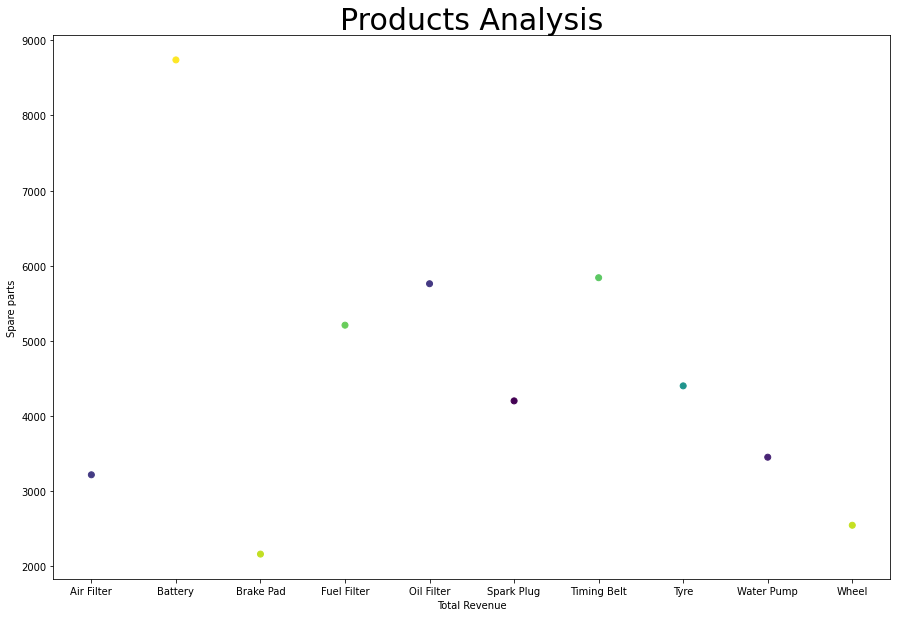

In [8]:
import numpy as np

# Group the dataframe by spare parts
grouped_sales = df.groupby("spare_parts")["total_revenue"].sum()

# Setting up the graph size
fig, ax = plt.subplots(figsize=(15, 10))
colors = np.random.rand(10)
plt.scatter( grouped_sales.index,grouped_sales, c=colors, alpha=1.0)
plt.xlabel(xlabel="Total Revenue")
plt.ylabel(ylabel= "Spare parts")
plt.title("Products Analysis", fontsize= 30)
plt.show()

## 4.	

#### Filter the DataFrame to return only columns with integer data type. Save this to a new variable.

In [9]:
df2 = df.select_dtypes(include='int')
df2.head()

,quantity,costs,sale_price,total_revenue
0,24,30,53,1272
1,20,80,110,2200
2,46,85,95,4370
3,37,36,48,1776
4,28,96,120,3360


## 5.

#### What is the most profitable and least profitable product? What is the difference in profit between the most profitable and the least profitable product? By how what percentage, will the total profit drop if the least profitable product was dropped?

In [10]:
df["total_costs"] = df["costs"] * df["quantity"]
df["profit"] = df["total_revenue"] - df["total_costs"]
df.head()

,spare_parts,quantity,costs,sale_price,date,total_revenue,total_costs,profit
0,Wheel,24,30,53,1 01 2020,1272,720,552
1,Tyre,20,80,110,2 01 2020,2200,1600,600
2,Battery,46,85,95,3 01 2020,4370,3910,460
3,Air Filter,37,36,48,4 01 2020,1776,1332,444
4,Oil Filter,28,96,120,5 01 2020,3360,2688,672


In [11]:
# Grouping data by spare parts
df_group = df.groupby("spare_parts")[["profit"]].sum()

# getting the most profitable product 
most_profitable_product = df_group.loc[:,"profit"].idxmax()

# getting the least profitable product 
least_profitable_product = df_group.loc[:,"profit"].idxmin()

print(f'The most profitable product is: {most_profitable_product}')
print(f'The least profitable product is: {least_profitable_product}')

The most profitable product is: Timing Belt
The least profitable product is: Air Filter


In [12]:
# getting the most profitable product and amount
max_value_row = df_group.loc[df_group['profit'].idxmax()]

# getting the minumum profitable product and amount
min_value_row = df_group.loc[df_group['profit'].idxmin()]

difference_in_profit = max_value_row - min_value_row
print("Profit difference between the most profitable and least profitable "
       "product is", difference_in_profit.iloc[0]) 

Profit difference between the most profitable and least profitable product is 1556


In [13]:
# Sum the profit column
total_profit = df_group["profit"].sum()

# Find the least profit value
least_profitable_profit = df_group["profit"].min()

# Calculate the percentage drop
percentage_drop = least_profitable_profit/total_profit*100
print(f'{percentage_drop:.2f}%')

5.77%


## 6. 

#### Use a 3D scatter plot to visualize the relationship between price, quantity, and total sales for each item.

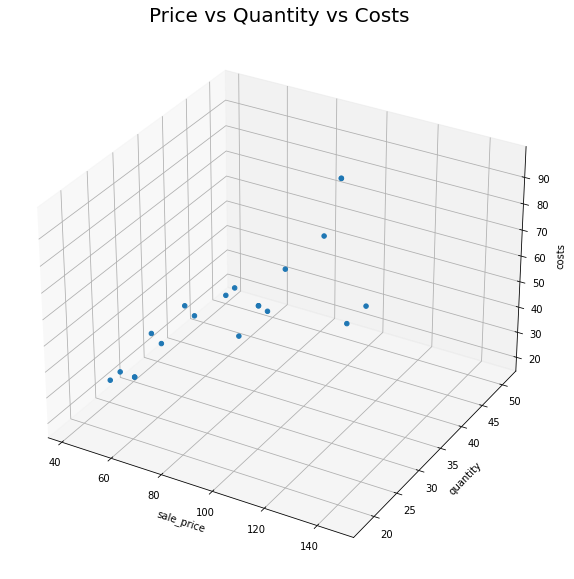

In [14]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data using the scatter() method
ax.scatter(df['sale_price'], 
           df['quantity'], 
           df['costs'],
           alpha=1.0)

# Add labels to the axes
ax.set_xlabel('sale_price')
ax.set_ylabel('quantity')
ax.set_zlabel('costs')
plt.title("Price vs Quantity vs Costs", fontsize= 20)
plt.show()

## 7. 

#### The sns pairplot is a very important tool for visualizing relationship between variables in a data set. Use the pairplot to plot to visualize the relationship of all the variables in the dataset.

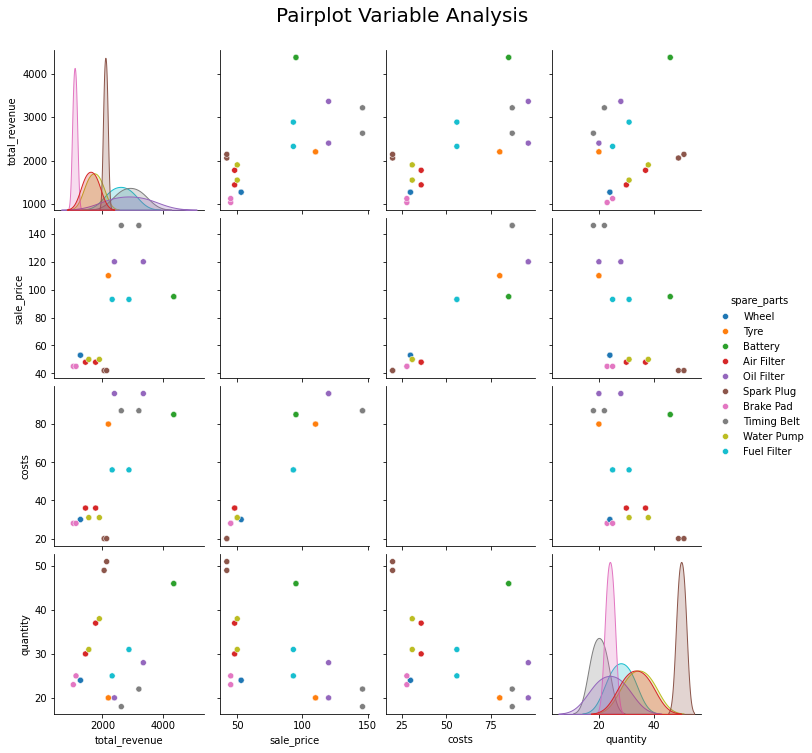

In [15]:
sns.pairplot(df[['total_revenue','sale_price', 'costs', 'quantity', 'spare_parts']], 
             hue="spare_parts")
plt.title("Pairplot Variable Analysis", y=4.3, x=-1, fontsize=20)
plt.show()

## 8.	

#### Use a seaborn barplot to visualize the distribution of quantities for each item.

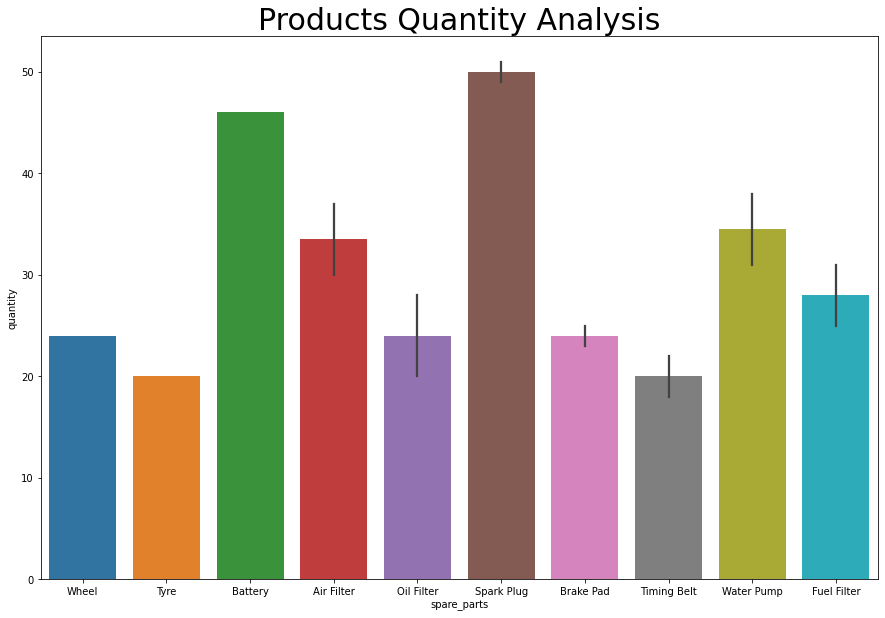

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
sns.barplot(x="spare_parts",y = "quantity", 
            hue="spare_parts", data = df)
plt.title("Products Quantity Analysis", fontsize = 30)
plt.show()

## 9.	

#### Use a Seaborn lineplot to visualize the trend of total sales over time for all items combined.

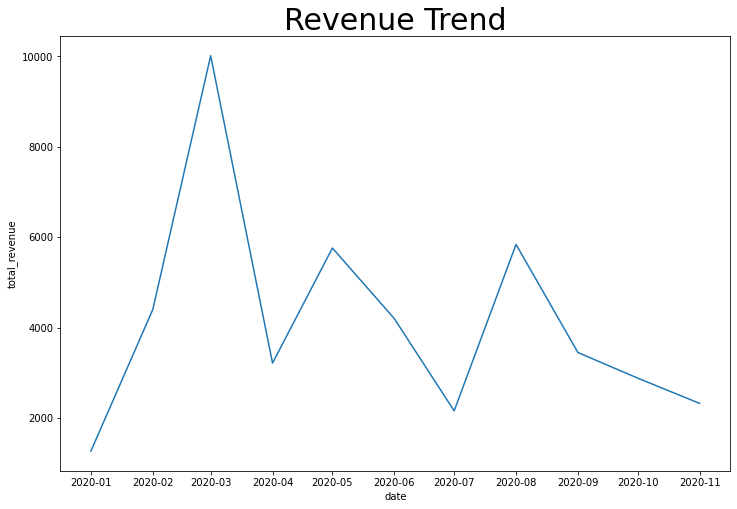

In [17]:
# Convert the date to datetime format
df["date"] = pd.to_datetime(df["date"])

# Group the revenue by date
df_group = df.groupby("date")["total_revenue"].sum()

fig = plt.figure(figsize=(12, 8))
sns.lineplot(x = df_group.index, y = df_group)
plt.title("Revenue Trend", fontsize = 30)
plt.show()

## 10.	

#### Use a Seaborn lmplot to fit a linear regression model and visualize the relationship between price and total revenue. Your plot should have a white grid style and a height of 8.

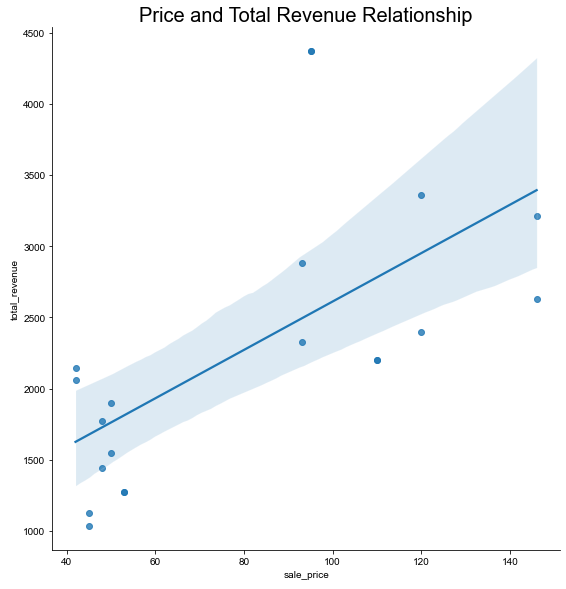

In [18]:
sns.lmplot(x = "sale_price",
           y = "total_revenue",
           fit_reg=True,
           height = 8,
           data=df) 
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title("Price and Total Revenue Relationship", fontsize = 20)
plt.show()